# 🚗 Predictive Modeling for Car Prices

This notebook presents a clean, professional pipeline to predict automobile prices using machine learning.

🔍 Workflow Overview:

1. **Building Linear and Multiple Linear Regression Models**
2. **Evaluating Model Fit with Visualizations**
3. **Enhancing Models with Polynomial Features and Pipelines**
4. **Quantitative Evaluation Using R² and MSE**
5. **Decision Making**
6. **Model Comparison and Final Recommendations**

**Import libraries:**


In [3]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Settings
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
#%matplotlib inline

**Load & Preview Dataset**


In [5]:
df = pd.read_csv('automobileEDA.csv')
print("✅ Data loaded successfully.")


✅ Data loaded successfully.


In [6]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Building Linear and Multiple Linear Regression Models


### a. Linear Regression


One of the predictive models we'll use is **Simple Linear Regression**.

This method helps us understand the relationship between two variables:

- **X**: The predictor (independent) variable  
- **Y**: The response (dependent) variable we want to predict

The result of simple linear regression is a **linear equation** that models the dependent/predictor variable **X** as a function of the independent/response variable **Y**.
The general form of a simple linear regression model is:

$$
Y = a + bX
$$

Where:

- **a** is the **intercept** — the predicted value of **Y** when **X = 0**.
- **b** is the **slope** — it represents how much **Y** changes for every one-unit increase in **X**.




**Creating the linear regression object:**

In [11]:
lm = LinearRegression()

We begin by exploring how the feature **`highway-mpg`** influences **car price** using a simple linear regression model.  

In this case:
- **Predictor (X):** `highway-mpg`  
- **Response (Y):** `price`

The goal is to fit a linear equation that estimates car price based on highway fuel efficiency.


In [13]:
X = df[['highway-mpg']]
Y = df['price']

Linear model Fitting using highway-mpg:


In [15]:
lm.fit(X,Y)

LinearRegression()

We can output a prediction:

In [17]:
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

**Intercept**:

In [19]:
lm.intercept_

38423.305858157386

**Slope:**

In [21]:
lm.coef_

array([-821.73337832])

### b. Multiple Linear Regression

What if we want to predict car price using more than one variable?

To build a more accurate model for predicting car prices, we can include multiple variables using **Multiple Linear Regression**. This approach is an extension of Simple Linear Regression and helps model the relationship between one continuous response (dependent) variable and **two or more** predictor (independent) variables.

The general form of the equation is:

$$
Y = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

From the previous section, we identified several variables that are good predictors of price:

- Horsepower  
- Curb-weight  
- Engine-size  
- Highway-mpg  

Let’s build a regression model using these variables as predictors.


In [23]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.


In [25]:
lm.fit(Z, df['price'])

LinearRegression()

We can output a prediction:

In [27]:
Y_hat = lm.predict(Z)

**Intercept:**

In [29]:
lm.intercept_

-15806.624626329198

**Slope:**

In [31]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

## 2. Evaluating Model Fit with Visualizations

After developing our regression models, the next step is to evaluate how well they fit the data. One effective way to assess model performance is through visualizations.

Here are three common techniques used to visualize the fit of a regression model:

- **Regression Plot**
- **Residual Plot**
- **Distribution Plot**

### a. Regression Plot

For simple linear regression, **regression plots** are a great way to visualize how well the model fits the data.

A regression plot combines a **scatter plot** of the data points with a **fitted regression line**. This helps us understand:

- The relationship between the variables  
- The strength of the correlation  
- The direction of the relationship (positive or negative)  

Let’s take a look at `highway-mpg` as a potential predictor of car price:


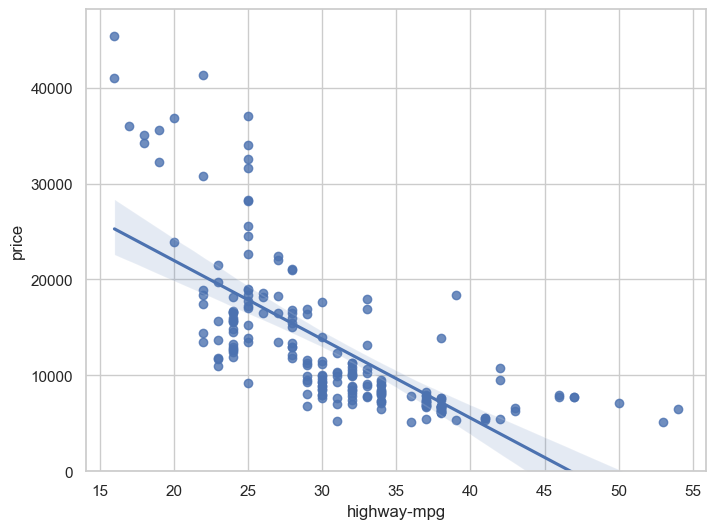

In [33]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.show()

From the plot, we can observe a negative correlation between price and highway-mpg — as highway-mpg increases, car price tends to decrease. This is evident from the negative slope of the regression line.

When interpreting regression plots, it’s important to notice how tightly the data points cluster around the line. If the data points are closely packed, it indicates a good fit. If they are widely scattered, a linear model may not be the best choice for the data.

Now, let’s compare this with a regression plot using peak-rpm:


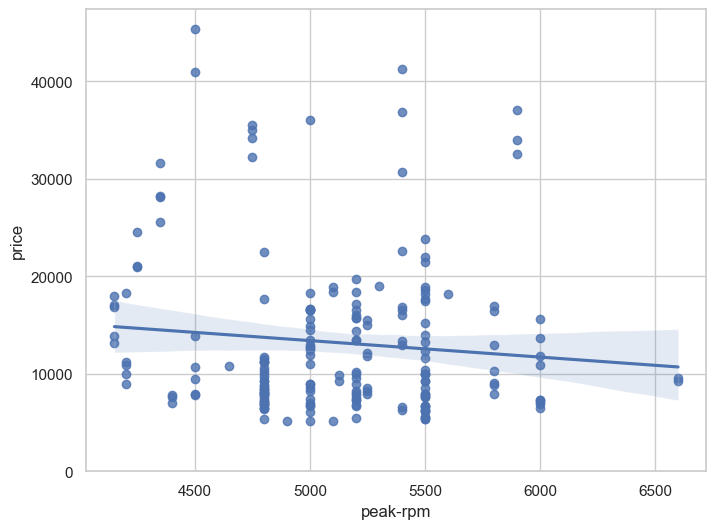

In [35]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)
plt.show()

Comparing both plots:

- The data points for highway-mpg are more tightly clustered around the regression line, suggesting a stronger linear relationship.

- The peak-rpm plot shows more variability around the line, making it harder to determine a clear trend.


We can confirm this observation using the **.corr()** method to compute correlation coefficients:

In [38]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


It shows that the variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.


### b. Residual Plot

One useful way to assess how well a regression model fits the data is by looking at a **residual plot**. Residual plots help us visualize the **variance** in our data and determine whether a **linear model** is suitable.

When interpreting a residual plot, we focus on the **pattern of residuals**:

- If the residuals are **randomly scattered** around the horizontal axis (x-axis), it suggests that the variance is constant and the linear model is appropriate.
- If there is a **pattern or curve** in the residuals, it may indicate that a linear model is not the best fit, and a non-linear approach might be more appropriate.

In summary, a good linear model will produce a residual plot with **no clear pattern**, confirming that the model's assumptions are likely satisfied.


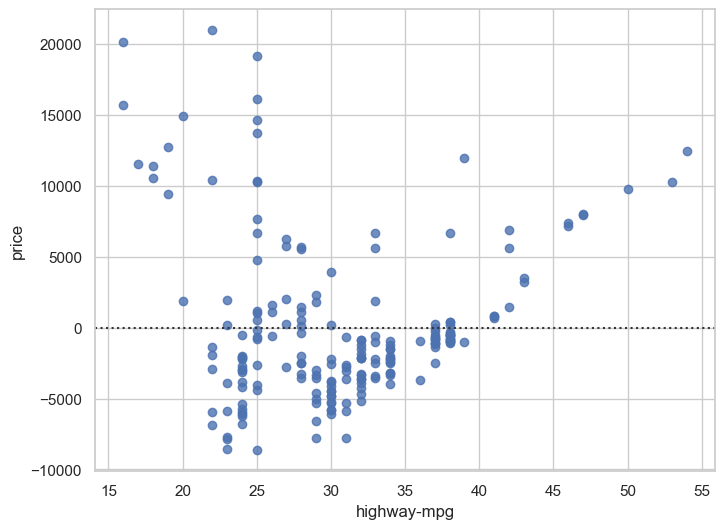

In [41]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

From the residual plot, we observe that the residuals are **not randomly dispersed** around the x-axis. Instead, they appear to follow a pattern or curve. 

This suggests that the **assumption of linearity may not hold** for this dataset. In such cases, a **non-linear model** could potentially provide a better fit and more accurate predictions.


### c. Distribution Plot

**Linear Regression Model**

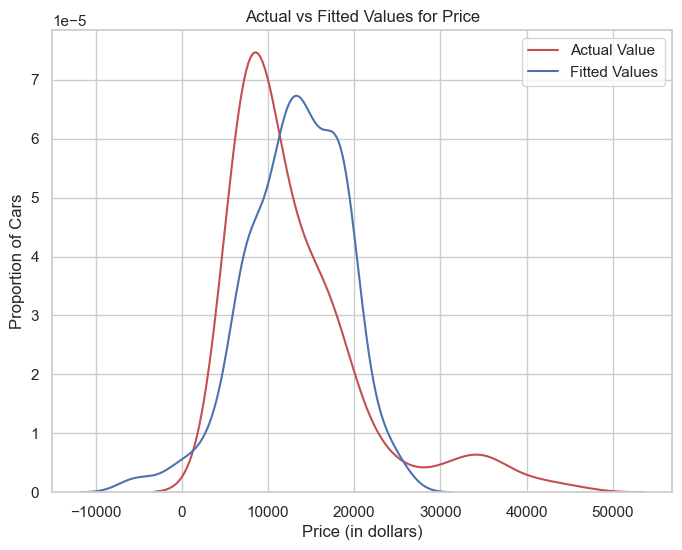

In [45]:
#Plot
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
plt.close()

**Multiple Linear Regression Model**


Unlike simple linear regression, where we can use regression or residual plots, visualizing multiple linear regression becomes more complex due to the presence of multiple predictors.

One effective approach is to use a **distribution plot**. By comparing the distribution of the **predicted values** (from the model) to the distribution of the **actual target values**, we can get a sense of how well the model fits the data.

A good model will have predicted values that closely follow the distribution of the actual values.

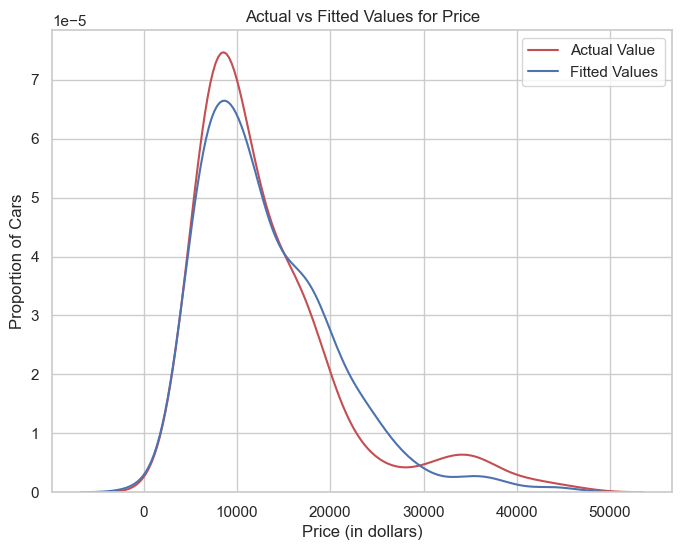

In [48]:
#Plot
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
plt.close()

We observe that the distribution of the predicted values aligns fairly well with the actual values, as indicated by the partial overlap between the two curves. This suggests that the model captures some of the underlying patterns in the data. However, the differences in the shapes of the distributions also indicate that there is still room to improve the model's accuracy.


## 3. Enhancing Models with Polynomial Features and Pipelines

### a. Polynomial Regression

**Polynomial regression** is an extension of linear and multiple linear regression. It allows us to model non-linear relationships by including higher-order terms (such as squares or cubes) of the predictor variables.

Depending on the degree of the polynomial, we can model increasingly complex relationships between the predictor and the response variable.

$$
Y = a + b_1 X + b_2 X^2 + b_3 X^3
$$

Earlier, we noticed that a simple linear model did not capture the relationship well when using `"highway-mpg"` to predict price. Now, we'll try fitting a polynomial regression model to see if it improves the performance.

The following function will help us visualize the polynomial fit against the actual data:


In [51]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's get the variables:


In [53]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.


In [55]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


 Let's plot the function:


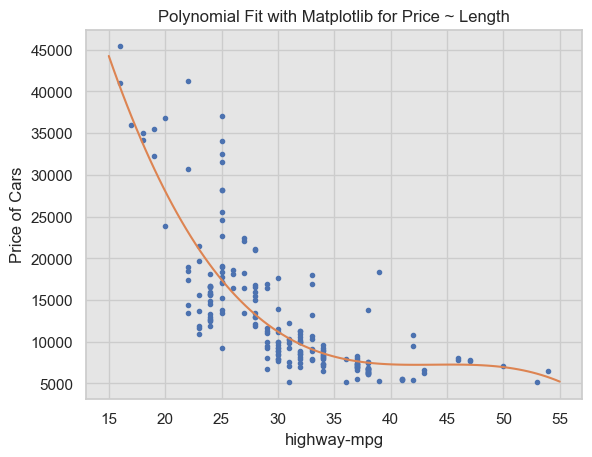

In [57]:
PlotPolly(p, x, y, 'highway-mpg')

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


### b. Multivariate Polynomial Function

Modeling polynomial relationships with multiple input variables can lead to more complex equations. For example, a second-order polynomial (degree = 2) involving two features has the following general form:

$$
Y = a + b_1 X_1 + b_2 X_2 + b_3 X_1 X_2 + b_4 X_1^2 + b_5 X_2^2
$$

This equation includes linear terms, interaction terms (e.g., \( X_1 X_2 \)), and squared terms for each feature, allowing the model to capture more intricate relationships between variables.

To perform polynomial transformation on multiple features in practice, we can use the `PolynomialFeatures` module from `sklearn.preprocessing`.

In [60]:
pr=PolynomialFeatures(degree=2)

In [61]:
Z_pr=pr.fit_transform(Z)

In the original data, there are 201 samples and 4 features.


In [63]:
Z.shape

(201, 4)

After the transformation, there are 201 samples and 15 features.


In [65]:
Z_pr.shape

(201, 15)

In [66]:
model = LinearRegression()
model.fit(Z_pr, y)

LinearRegression()

In [67]:
y_pred = model.predict(Z_pr)

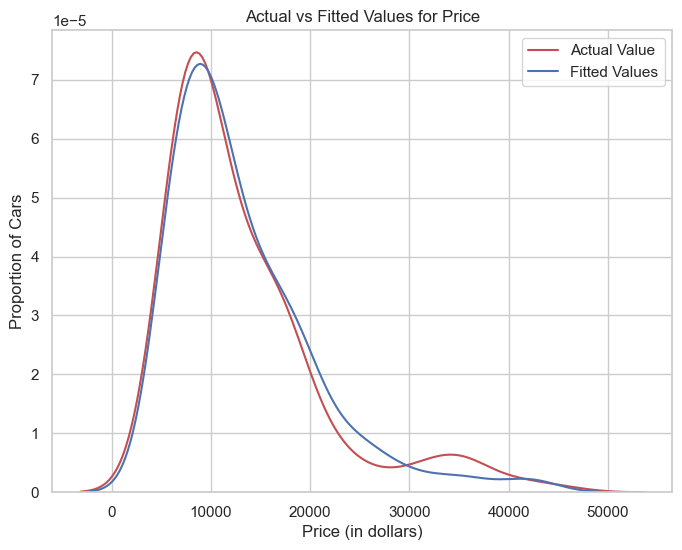

In [68]:
#To remove warnings
warnings.filterwarnings("ignore", category=UserWarning)
#Plot
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
plt.close()


### c. Pipeline


Data pipelines streamline and automate the sequence of data processing and modeling steps, making workflows cleaner and more efficient.

To build a pipeline in Python, we use the `Pipeline` class from `sklearn.pipeline`. Pipelines allow us to chain together multiple processing steps — such as scaling, transformation, and model fitting — into a single object.

A common preprocessing step is feature scaling, which can be done using `StandardScaler`. This ensures that all features are on the same scale before feeding them into a model.

We construct a pipeline by passing a list of tuples, where each tuple contains a name (as a string) and the corresponding transformer or estimator object.


In [71]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

We input the list as an argument to the pipeline constructor:


In [73]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously. 


In [75]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously.


In [77]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

## 4. Quantitative Evaluation Using R² and MSE

In addition to visualizing model performance, it's essential to have numerical metrics to evaluate how well our models are performing. Two widely used statistical measures for model evaluation are:

- **R² (R-squared)**
- **Mean Squared Error (MSE)**

**R² (R-squared)**

R-squared, also known as the *coefficient of determination*, represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

In simpler terms, it indicates how well the regression model explains the variability in the outcome. An R² value of 1 means the model perfectly fits the data, whereas a value closer to 0 means it explains very little of the variance.

**Mean Squared Error (MSE)**

The Mean Squared Error quantifies the average of the squared differences between the actual values and the predicted values:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

A lower MSE indicates better model performance, as it means the predictions are closer to the actual observations.


### 1. Simple Linear Regression Model


Let's calculate the R^2:


In [81]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".


Let's calculate the MSE:


We can predict the output i.e., "yhat" using the predict method, where X is the input variable:


In [85]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


We can compare the predicted results with the actual results:


In [87]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


### 2. Multiple Linear Regression Model

Let's calculate the R^2:


In [90]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".


Let's calculate the MSE.


We produce a prediction:


In [94]:
Y_predict_multifit = lm.predict(Z)

We compare the predicted results with the actual results:


In [96]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### 3. Polynomial Fit Model


Let's calculate the R^2.


Let’s import the function <b>r2_score</b> from the module <b>metrics</b> as we are using a different function.


We apply the function to get the value of R^2:


In [101]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.


We can also calculate the MSE:  


In [104]:
mean_squared_error(df['price'], p(x))

20474146.42636125

## 5. Decision Making

Now that we’ve visualized the models and calculated their R² and MSE values, how do we decide which model fits the data best?

- **What is a good R² value?**  
  When comparing models, the one with the **higher R² value** better explains the variability in the target variable.

- **What is a good MSE?**  
  The model with the **lower Mean Squared Error (MSE)** makes more accurate predictions and is considered a better fit.

#### Model Comparison Table

| Model                              | R² Score         | Mean Squared Error (MSE) |
|-----------------------------------|------------------|---------------------------|
| Simple Linear Regression          | 0.497            | 3.16 × 10⁷                |
| Multiple Linear Regression        | 0.809            | 1.20 × 10⁷                |
| Polynomial Regression (2nd Order) | 0.674            | 2.05 × 10⁷                |


## 6. Model Comparison and Final Recommendations


After evaluating all three models, we conclude that the **Multiple Linear Regression (MLR)** model provides the best predictive performance for estimating car prices.

This outcome is reasonable, considering our dataset contains 27 variables. It’s likely that multiple features contribute to the final price of a car. By incorporating several relevant predictors, the MLR model captures the underlying relationships more effectively than models based on a single feature.